In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/big-mart-sales/Train-Set.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.columns=['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
(df.isnull().sum()/len(df))*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
df.shape

(8523, 12)

In [6]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [7]:
df['Item_Identifier'].nunique()

1559

In [8]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [11]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
print('reg' in ['Low Fat','low fat', 'LF'])
print('LF' in ['Low Fat','low fat', 'LF'])

False
True


In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x : 'lf' if x in ['Low Fat' , 'low fat' , 'LF'] else 'reg')
df['Item_Fat_Content'].unique()

array(['lf', 'reg'], dtype=object)

In [14]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
lf     5517
reg    3006
Name: count, dtype: int64

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [18]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [19]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].str.replace('OUT0','').astype(int)

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df['Outlet_Establishment_Year'] = 2023 - df['Outlet_Establishment_Year']

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,24,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,25,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,36,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,24,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,25,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,36,High,Tier 3,Supermarket Type1,994.7052


In [27]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


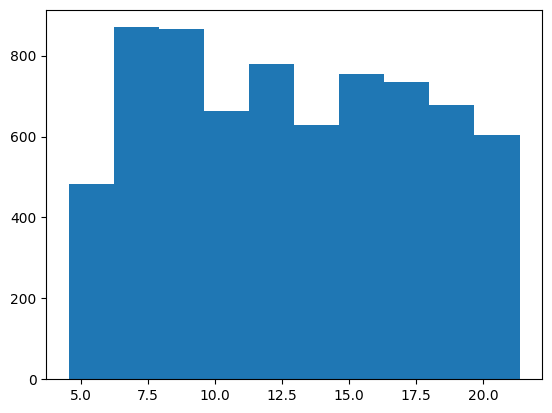

In [28]:
plt.hist(df['Item_Weight'])
plt.show()

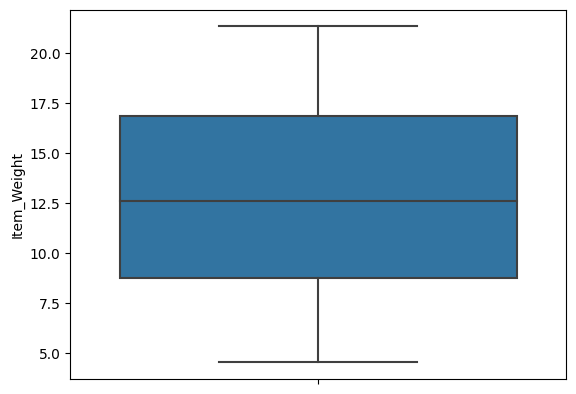

In [29]:
sns.boxplot(data = df , y = 'Item_Weight')
plt.show()

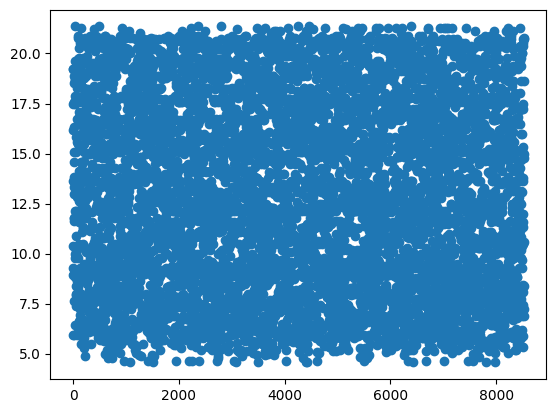

In [30]:
plt.scatter(range(len(df)) , df['Item_Weight'])
plt.show()

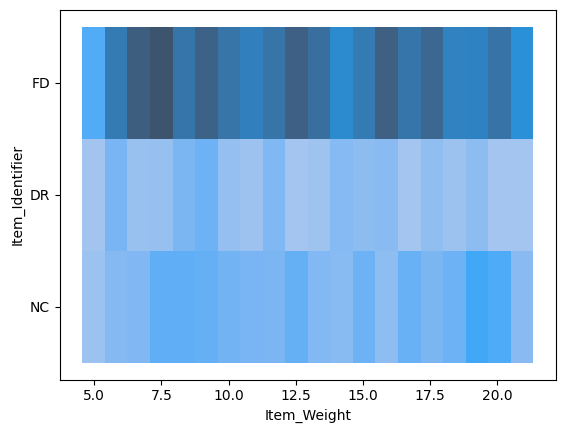

In [31]:
sns.histplot(data = df , y = 'Item_Identifier' , x = 'Item_Weight')
plt.show()

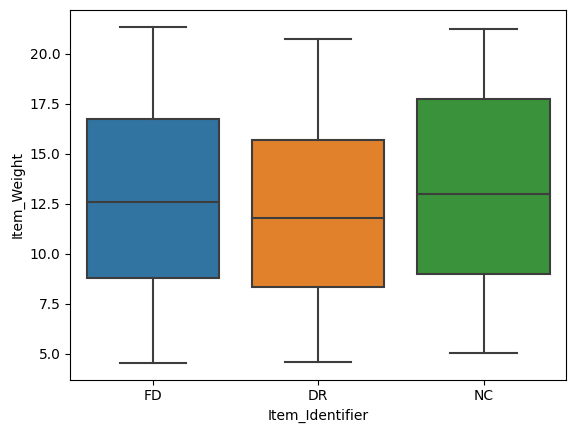

In [32]:
sns.boxplot(data = df , x = 'Item_Identifier' , y = 'Item_Weight')
plt.show()


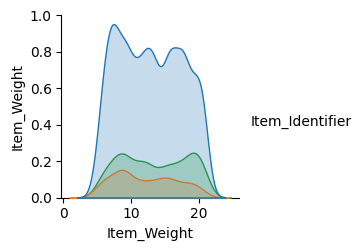

In [33]:
sns.pairplot(df[['Item_Identifier' , 'Item_Weight']] , hue = 'Item_Identifier')
plt.show()

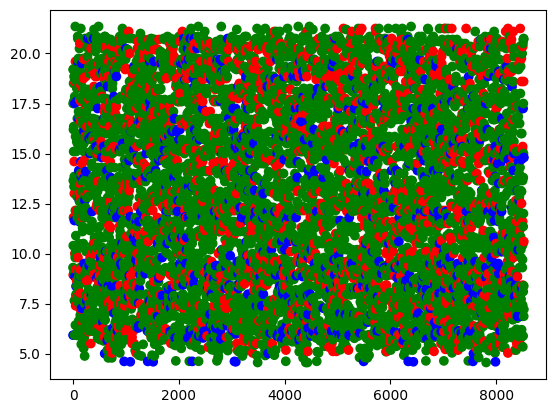

In [34]:
color_iide = df['Item_Identifier'].map({"FD" : 'g' , "DR" : 'b' , "NC" : 'r'})

plt.scatter(range(len(df)) , df['Item_Weight'] , c=color_iide)
plt.show()

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,24,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,25,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,36,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DR    12.072348
FD    12.832186
NC    13.354532
Name: Item_Weight, dtype: float64

In [37]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

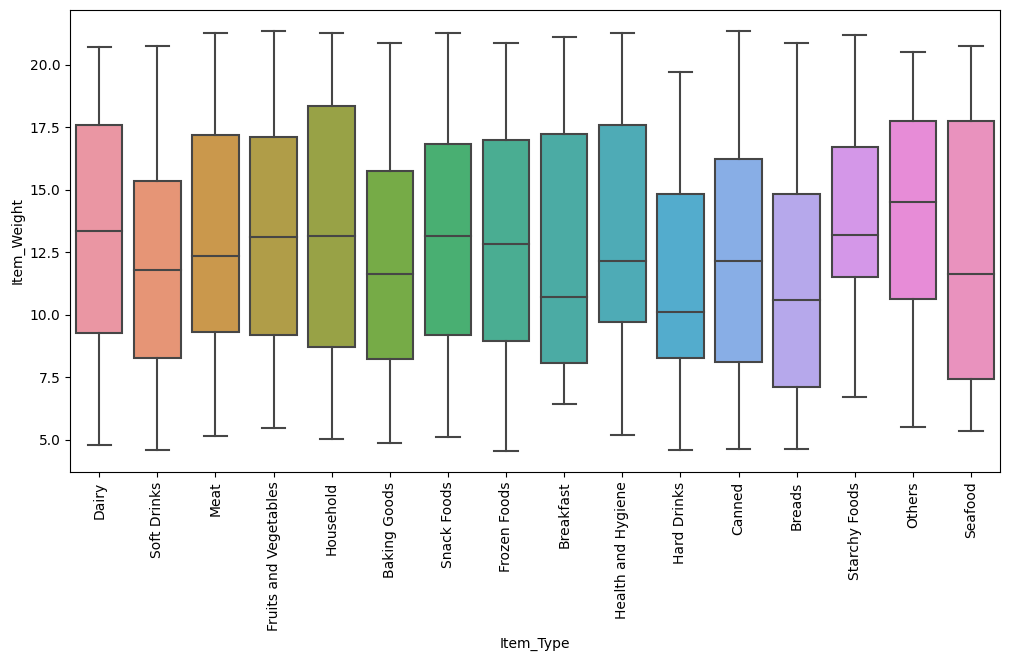

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df , x = 'Item_Type' , y = 'Item_Weight')
plt.xticks(rotation=90)
plt.show()

In [39]:
avg_item_weight = round(df.groupby('Item_Type')['Item_Weight'].mean(),2)
avg_item_weight

Item_Type
Baking Goods             12.28
Breads                   11.35
Breakfast                12.77
Canned                   12.31
Dairy                    13.43
Frozen Foods             12.87
Fruits and Vegetables    13.22
Hard Drinks              11.40
Health and Hygiene       13.14
Household                13.38
Meat                     12.82
Others                   13.85
Seafood                  12.55
Snack Foods              12.99
Soft Drinks              11.85
Starchy Foods            13.69
Name: Item_Weight, dtype: float64

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
df.shape

(8523, 12)

In [42]:
df.groupby('Item_Type')['Item_Weight'].transform('mean')

0       13.426069
1       11.847460
2       12.817344
3       13.224769
4       13.384736
          ...    
8518    12.987880
8519    12.277108
8520    13.142314
8521    12.987880
8522    11.847460
Name: Item_Weight, Length: 8523, dtype: float64

In [43]:
data = {'Category' : ['A','A','B','B','B','A'],
        'Weight' : [10 , 15 , 20 , 25 , None , None]}

dfx = pd.DataFrame(data)
dfx

,Category,Weight
0,A,10.0
1,A,15.0
2,B,20.0
3,B,25.0
4,B,NaN
5,A,NaN


In [44]:
data = {'Category' : ['A','A','B','B','B','A'],
        'Weight' : [10 , 15 , 20 , 25 , None , None]}

In [45]:
dfx = pd.DataFrame(data)
dfx

,Category,Weight
0,A,10.0
1,A,15.0
2,B,20.0
3,B,25.0
4,B,NaN
5,A,NaN


In [46]:
dfx.groupby('Category')['Weight'].mean()

Category
A    12.5
B    22.5
Name: Weight, dtype: float64

In [47]:
avg_weight_by_category = dfx.groupby('Category')['Weight'].transform('mean')
avg_weight_by_category

0    12.5
1    12.5
2    22.5
3    22.5
4    22.5
5    12.5
Name: Weight, dtype: float64

In [48]:
dfx['Weight'] = dfx['Weight'].fillna(avg_weight_by_category)
dfx

,Category,Weight
0,A,10.0
1,A,15.0
2,B,20.0
3,B,25.0
4,B,22.5
5,A,12.5


In [49]:
avg_weight_by_itemType = df.groupby('Item_Type')['Item_Weight'].transform('mean')

In [50]:
df['Item_Weight'] = df['Item_Weight'].fillna(avg_weight_by_itemType)

In [51]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,lf,0.016760,Meat,141.6180,49,24,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,25,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,lf,0.000000,Household,53.8614,13,36,High,Tier 3,Supermarket Type1,994.7052


In [52]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
dfy = pd.DataFrame({"Cat1" : ["A" , "A" , "B" , "A" , "B" , "B" , "C" , "C" , "A" , "C"],
                    "Cat2" : ["x" , "y" , "z" , "y" , "x" , "x" , "z" , "z" , "y" , "x"]})

In [54]:
dfy

,Cat1,Cat2
0,A,x
1,A,y
2,B,z
3,A,y
4,B,x
5,B,x
6,C,z
7,C,z
8,A,y
9,C,x


In [55]:
dfy['Cat1'].value_counts()

Cat1
A    4
B    3
C    3
Name: count, dtype: int64

In [56]:
dfy['Cat2'].value_counts()

Cat2
x    4
y    3
z    3
Name: count, dtype: int64

In [57]:
pd.crosstab(dfy['Cat1'] , dfy['Cat2'])

Cat2,x,y,z
Cat1,,,
A,1,3,0
B,2,0,1
C,1,0,2


In [58]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [59]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [60]:
pd.crosstab(df['Outlet_Size'], columns = df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [61]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [62]:
pd.crosstab(df['Outlet_Size'], columns = df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [63]:
df_os0 = df[df['Outlet_Size'].isnull()]

In [64]:
df_os1 = df[~df['Outlet_Size'].isnull()] 

In [65]:
df_os0.loc[ : , 'Outlet_Size'] = df_os0.loc[ : , 'Outlet_Location_Type'].apply(lambda x:'Medium' if x == "Tier 3" else 'Small')

In [66]:
df_os0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FD,19.200,reg,0.000000,Fruits and Vegetables,182.0950,10,25,Medium,Tier 3,Grocery Store,732.3800
8,FD,16.200,reg,0.016687,Frozen Foods,96.9726,45,21,Small,Tier 2,Supermarket Type1,1076.5986
9,FD,19.200,reg,0.094450,Frozen Foods,187.8214,17,16,Small,Tier 2,Supermarket Type1,4710.5350
25,NC,13.000,lf,0.099887,Household,45.9060,17,16,Small,Tier 2,Supermarket Type1,838.9080
28,FD,5.925,reg,0.161467,Dairy,45.5086,10,25,Medium,Tier 3,Grocery Store,178.4344


In [67]:
df2 = pd.concat((df_os0,df_os1) , axis = 'rows')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FD,19.200,reg,0.000000,Fruits and Vegetables,182.0950,10,25,Medium,Tier 3,Grocery Store,732.3800
8,FD,16.200,reg,0.016687,Frozen Foods,96.9726,45,21,Small,Tier 2,Supermarket Type1,1076.5986
9,FD,19.200,reg,0.094450,Frozen Foods,187.8214,17,16,Small,Tier 2,Supermarket Type1,4710.5350
25,NC,13.000,lf,0.099887,Household,45.9060,17,16,Small,Tier 2,Supermarket Type1,838.9080
28,FD,5.925,reg,0.161467,Dairy,45.5086,10,25,Medium,Tier 3,Grocery Store,178.4344


In [68]:
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [69]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [70]:
df2_num = df2.select_dtypes(include = 'number')
df2_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
3,19.200,0.000000,182.0950,10,25,732.3800
8,16.200,0.016687,96.9726,45,21,1076.5986
9,19.200,0.094450,187.8214,17,16,4710.5350
25,13.000,0.099887,45.9060,17,16,838.9080
28,5.925,0.161467,45.5086,10,25,178.4344


In [71]:
df2_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.009315,0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.111788,0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.004061,-0.005020,0.567574
Outlet_Identifier,-0.009315,-0.111788,0.004061,1.000000,-0.141465,0.152660
Outlet_Establishment_Year,0.008376,0.074834,-0.005020,-0.141465,1.000000,0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,0.152660,0.049135,1.000000


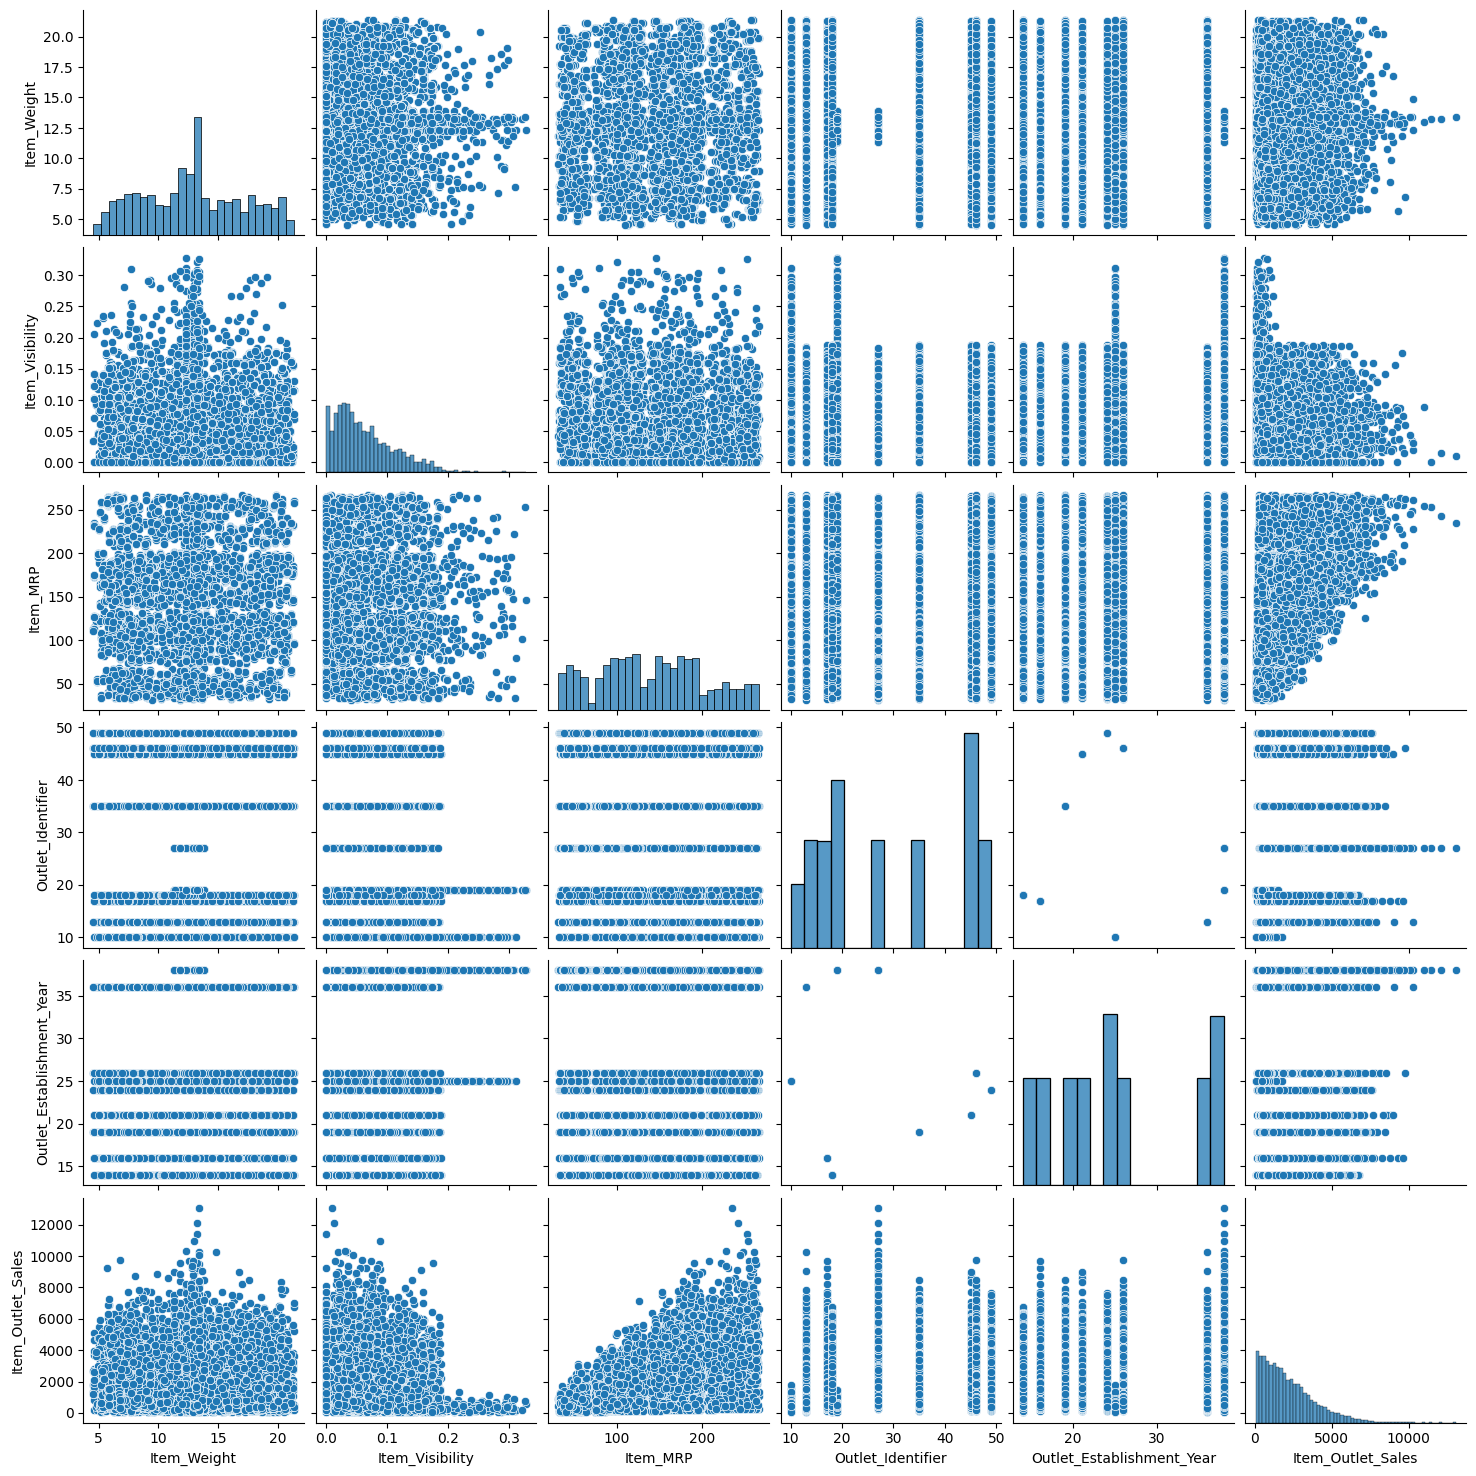

In [72]:
sns.pairplot(df2_num)

In [73]:
X = df.drop('Item_Outlet_Sales' , axis = 'columns')


In [74]:
Y = df['Item_Outlet_Sales']

In [75]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,9.30,lf,0.016047,Dairy,249.8092,49,24,Medium,Tier 1,Supermarket Type1
1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,18,14,Medium,Tier 3,Supermarket Type2
2,FD,17.50,lf,0.016760,Meat,141.6180,49,24,Medium,Tier 1,Supermarket Type1
3,FD,19.20,reg,0.000000,Fruits and Vegetables,182.0950,10,25,NaN,Tier 3,Grocery Store
4,NC,8.93,lf,0.000000,Household,53.8614,13,36,High,Tier 3,Supermarket Type1


<Axes: >

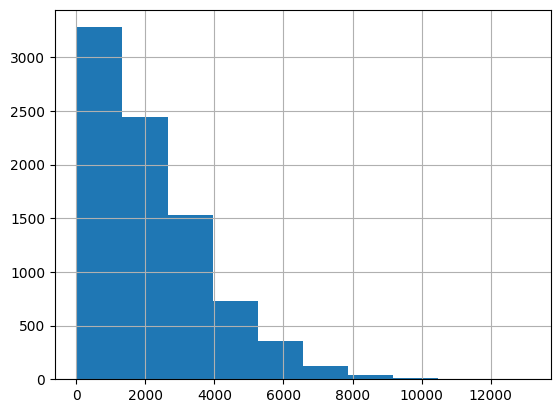

In [76]:
Y.hist()

In [77]:
Xt = pd.get_dummies(X)
Yt = np.log(Y)

In [78]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xt,Yt)

In [79]:

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [80]:

from sklearn.metrics import mean_absolute_error,r2_score

ytrainPre=model1.predict(xtrain)
ytestPre=model1.predict(xtest)

maeTrain = mean_absolute_error(ytrain,ytrainPre)
maeTest = mean_absolute_error(ytest,ytestPre)

r2Train = r2_score(ytrain,ytrainPre)
r2Test = r2_score(ytest,ytestPre)

print({"Train MAE" : maeTrain , "Test MAE" : maeTest})
print({"R2_Train" : r2Train , "R2_Test" : r2Test})

{'Train MAE': 0.412840889776572, 'Test MAE': 0.4258227972095778}
{'R2_Train': 0.7279901781243241, 'R2_Test': 0.6992680059247238}


<Axes: >

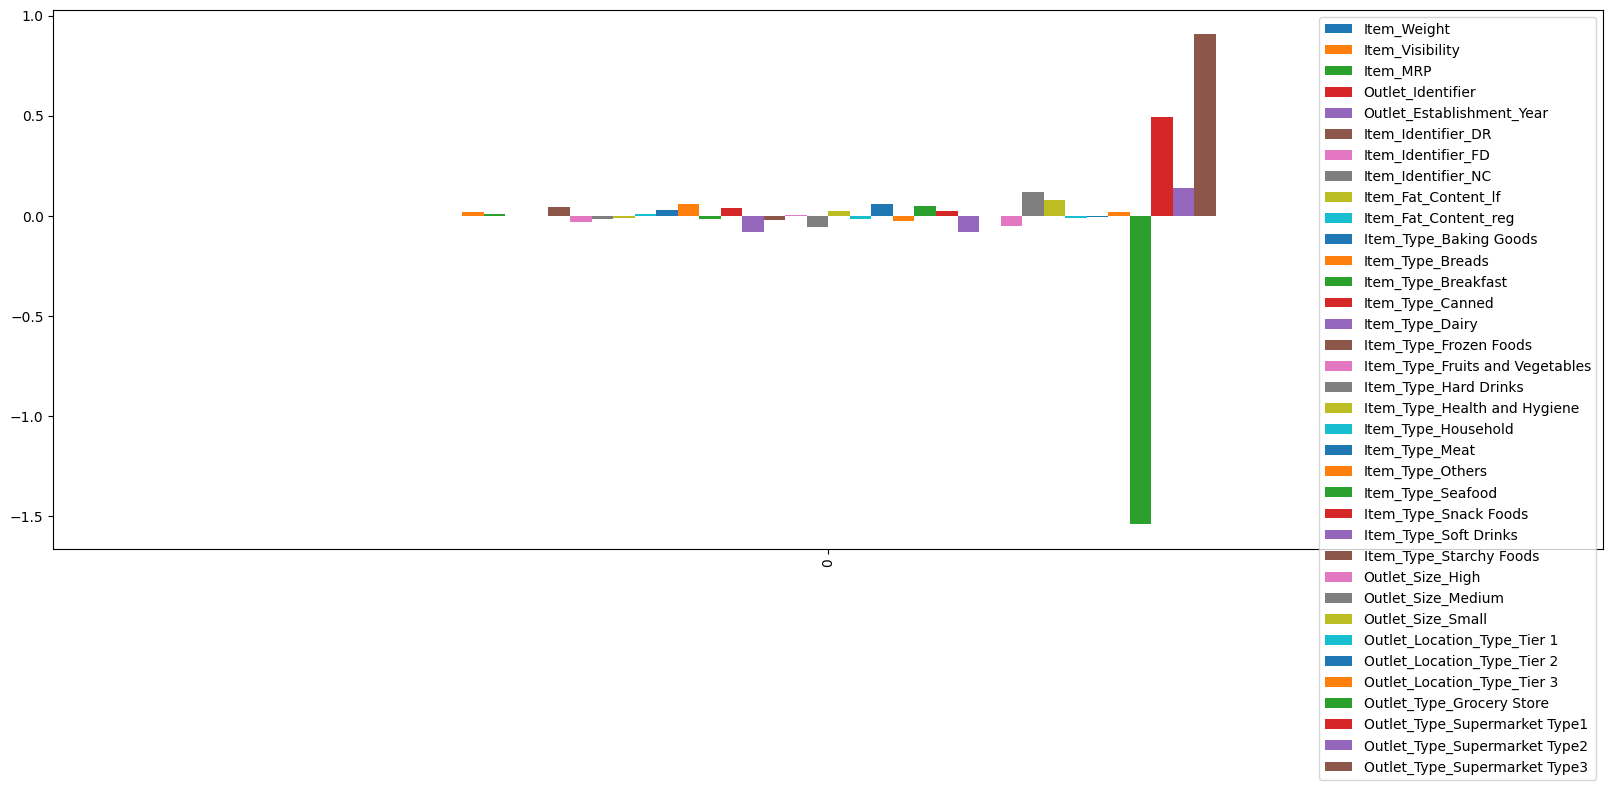

In [81]:

pd.DataFrame(model1.coef_.reshape(1,-1) , columns = xtrain.columns)

pd.DataFrame(model1.coef_.reshape(1,-1) , columns = xtrain.columns).plot.bar(figsize=(20,7))


In [82]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


#Ridge regression hyperparameter tuning
ridge_param_grid = {'alpha' : [0.001,0.01,0.1,1,10,100]}
model2=Ridge()

ridge_grid_search = GridSearchCV(model2 , ridge_param_grid, cv=5 , scoring = 'neg_mean_squared_error')
ridge_grid_search.fit(xtrain,ytrain)

#best ridge model
best_ridge_model = ridge_grid_search.best_estimator_

#Print best aplha value
print("Best Ridge alpha" , ridge_grid_search.best_params_['alpha'])


Best Ridge alpha 1


In [83]:

from sklearn.metrics import mean_absolute_error,r2_score

ytrainPre = best_ridge_model.predict(xtrain)
ytestPre = best_ridge_model.predict(xtest)

maeTrain = mean_absolute_error(ytrain,ytrainPre)
maeTest = mean_absolute_error(ytest,ytestPre)

r2Train = r2_score(ytrain,ytrainPre)
r2Test = r2_score(ytest,ytestPre)

print({"Train MAE" : maeTrain , "Test MAE" : maeTest})
print({"R2_Train" : r2Train , "R2_Test" : r2Test})


{'Train MAE': 0.41284657738095404, 'Test MAE': 0.4257864261979656}
{'R2_Train': 0.7279881798180192, 'R2_Test': 0.6993411651468906}


In [84]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Ridge regression hyperparameter tuning
ridge_param_grid = {'alpha' : [0.001,0.01,0.1,1,10,100]}
model3 = Lasso()

lasso_grid_search = GridSearchCV(model3 , ridge_param_grid, cv=5 , scoring = 'neg_mean_squared_error')
lasso_grid_search.fit(xtrain,ytrain)

#best ridge model
best_lasso_model = lasso_grid_search.best_estimator_

#Print best aplha value
print("Best Lasso alpha" , lasso_grid_search.best_params_['alpha'])

Best Lasso alpha 0.001


In [85]:
from sklearn.metrics import mean_absolute_error,r2_score

ytrainPre = best_lasso_model.predict(xtrain)
ytestPre = best_lasso_model.predict(xtest)

maeTrain = mean_absolute_error(ytrain,ytrainPre)
maeTest = mean_absolute_error(ytest,ytestPre)

r2Train = r2_score(ytrain,ytrainPre)
r2Test = r2_score(ytest,ytestPre)

print({"Train MAE" : maeTrain , "Test MAE" : maeTest})
print({"R2_Train" : r2Train , "R2_Test" : r2Test})

{'Train MAE': 0.41302857771631724, 'Test MAE': 0.4249925564731545}
{'R2_Train': 0.72757667412236, 'R2_Test': 0.7002541471365342}
